In [0]:
#using a pretrained cnn - VGG16 (trained on imagenet data set of animals) 
#this is available as an application in keras
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',                          #this argument is weight initialisation we can use either the imagenet weights or random initialisation
            include_top=False,                                 #False => not to use the dense layers 
            input_shape=(150, 150, 3))

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#defining direcory location for the image input to the network, no need to use os.mkdir here since directory is already made before
G_Path = '/content/drive/My Drive/Colab Notebooks/'
base_dir = G_Path+'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [7]:
G_Path = '/content/drive/My Drive/Colab Notebooks/'
base_dir = G_Path+'cats_and_dogs_small'
print (G_Path)
print (base_dir)


/content/drive/My Drive/Colab Notebooks/
/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#designing the network architecture with the conv base as first layer and then adding dense classifier to it
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#freezing the conv base weights so that it is not modified while feeding the data through it
print('This is the number of trainable param tensors '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable param tensors '
      'after freezing the conv base:', len(model.trainable_weights))
#4 indicate we have 2 dense layers each ontaining one weight matrix and one bias vector

('This is the number of trainable param tensors before freezing the conv base:', 30)
('This is the number of trainable param tensors after freezing the conv base:', 4)


In [10]:
#training the model end to end with the frozen conv base and augmented data i/p to the network
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#augmenting data using imagedatagenerator class of keras
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
#validation data is not augmented only rescaled to values btwn 0 and 1 for easy processing of the data
test_datagen = ImageDataGenerator(rescale=1./255)

#generator fot train data
train_generator = train_datagen.flow_from_directory(            #using flow from directory method of imagedatagenerator class to generate datas
                  train_dir,                                    #specifying directory from which data is to be loaded
                  target_size=(150, 150),                       #resizing the image
                  batch_size=20,
                  class_mode='binary')

#generator fot validation data
validation_generator = test_datagen.flow_from_directory(
                       validation_dir,
                       target_size=(150, 150),
                       batch_size=20,
                       class_mode='binary')

#compiling the designed model
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

#fitting the generated augmented images to the corresponding labels by using the compiled model 
history = model.fit_generator( 
          train_generator,                                #generating the train data
          steps_per_epoch=100,                            #breaking the data generation and now its time for weight updates, this marks one epoch
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)


Found 2000 images belonging to 2 classes.


W0322 19:39:40.838674 140476549842816 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0322 19:39:40.850765 140476549842816 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0322 19:39:40.858378 140476549842816 deprecation.py:323] From /tensorflow-1.15.0/python2.7/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 1000 images belonging to 2 classes.


W0322 19:39:41.049402 140476549842816 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0322 19:39:41.056690 140476549842816 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/30
100/100 [==============================] - 573s 6s/step - loss: 0.6167 - acc: 0.6740 - val_loss: 0.4615 - val_acc: 0.8240
Epoch 2/30
100/100 [==============================] - 23s 230ms/step - loss: 0.4779 - acc: 0.8000 - val_loss: 0.3820 - val_acc: 0.8430
Epoch 3/30
100/100 [==============================] - 22s 223ms/step - loss: 0.4332 - acc: 0.8120 - val_loss: 0.3279 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.3977 - acc: 0.8250 - val_loss: 0.3042 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 22s 225ms/step - loss: 0.3722 - acc: 0.8410 - val_loss: 0.2901 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 22s 222ms/step - loss: 0.3602 - acc: 0.8440 - val_loss: 0.2911 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 22s 224ms/step - loss: 0.3508 - acc: 0.8480 - val_loss: 0.2744 - val_acc: 0.8870
Epoch 8/30
100/100 [==============================] - 22s

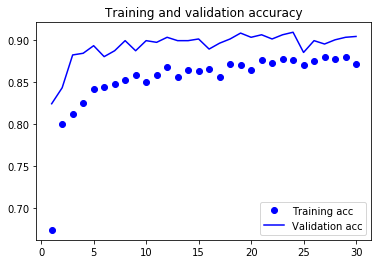

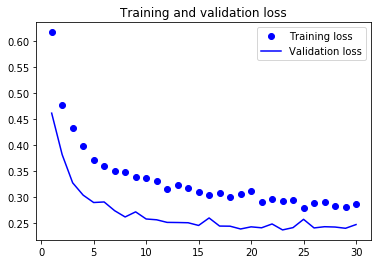

In [11]:
#plotting the results - training (accuracy and losses) vs validation (accuracy and losses)
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#finetuning - training by unfreezing only few top layers of conv base
conv_base.trainable = True                                #unfreezing the whole convnet

set_trainable = False                                    #initialising a boolean variable

for layer in conv_base.layers:                           #iterating over layers in conv net
    if layer.name == 'block5_conv1':                     #if layer name is block5(the block just above FCN) then making those layers trainable
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False     
        
        

In [15]:
#compiling the model with a very low learning rate : so that the trainable weights
#of the convnet is not modified too much, which might harm the representations it is having
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),     #learning rate is set low        
              metrics=['acc'])

#fitting the model with generated augmented i/p images and its labels using the 
#model with top few conv layer set to trainable
history = model.fit_generator(
          train_generator,                              #loading train data from this directory
          steps_per_epoch=100,                          #breaking the data generation, with this one epoch is completed and the trainable weights are updated
          epochs=100,
          validation_data=validation_generator,         #loading the unaugmented validation data
          validation_steps=50)




Epoch 1/100
100/100 [==============================] - 25s 252ms/step - loss: 0.2850 - acc: 0.8785 - val_loss: 0.2255 - val_acc: 0.9130
Epoch 2/100
100/100 [==============================] - 23s 226ms/step - loss: 0.2582 - acc: 0.8890 - val_loss: 0.2091 - val_acc: 0.9130
Epoch 3/100
100/100 [==============================] - 23s 227ms/step - loss: 0.2356 - acc: 0.8980 - val_loss: 0.2037 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 23s 228ms/step - loss: 0.2255 - acc: 0.9075 - val_loss: 0.2232 - val_acc: 0.9070
Epoch 5/100
100/100 [==============================] - 23s 227ms/step - loss: 0.2121 - acc: 0.9090 - val_loss: 0.1978 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 23s 229ms/step - loss: 0.1866 - acc: 0.9270 - val_loss: 0.1987 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 22s 225ms/step - loss: 0.1836 - acc: 0.9280 - val_loss: 0.2047 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

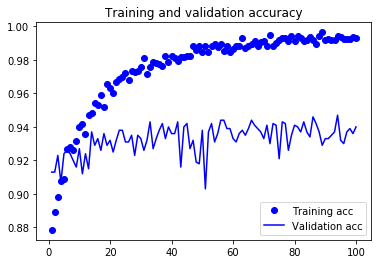

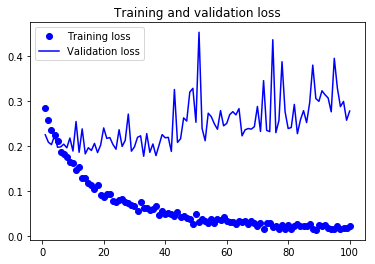

In [16]:
#plotting the results after unfreezing top 3 layers of pretrained convnet - training (accuracy and losses) vs validation (accuracy and losses)
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Accuracy increased to above 90 but Validation accuracy doesnot improve much after 15 epochs 
#the training need to be stopped aroung 15 epochs

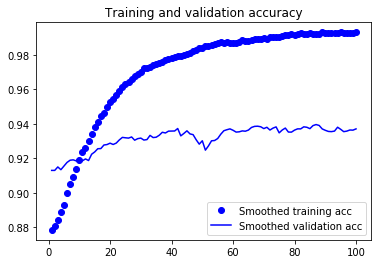

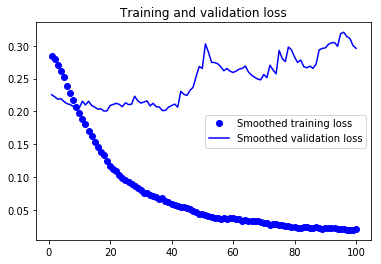

In [17]:
#smoothening the curves
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [18]:
#evaluating the model for the test data
#generating test data
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150, 150),
                 batch_size=20,
                 class_mode='binary')
#evaluating the result of the test data on the trained model
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
('test acc:', 0.9419999921321869)
